In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

def plotcat(cat_df, title, ax=None):
    """ Given a catalog of hpevents intervals
    plot it
    """
    start_time = cat_df.iloc[0,0]
    stop_time = cat_df.iloc[-1,1]
    
    new_idx = pd.date_range(start=start_time, end=stop_time, freq='D')
    new_data = [None]*len(new_idx)
    const_df = pd.DataFrame(data=new_data, index=new_idx)
    

    if ax is None:
        fig, ax = plt.subplots(figsize=(16, 5))
    # ax.plot(const_df)
    ax.set_title('HP Events for '+title, fontsize=8)
    # ax.set_xlabel('Date', fontsize=15)
    date_format = '%d %b %y'
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter(date_format))
    
    # ax.xticks(fontsize=6)#, rotation=45)
    ax.tick_params(axis='x', labelsize=6)#, rotation=30)

    
    for  _d in cat_df.values:
        ax.axvspan(_d[0], _d[1], facecolor='yellow', alpha=0.5, hatch='/', edgecolor='blue', linewidth=2)



def cat2df(file_path):
    """ Read a catalog file, return a list  of intervals
    
    """
    
    # filepath = os.path.join(os.getcwd(), '..', 'resources-tests', '105194angeo282332010_bibheliotech_V1.txt')
    with open(file_path, 'r') as cat_f:
        catlines = cat_f.readlines()

    return lines2df(catlines)

def lines2df(catlines):
    """ Read a catalog file, return a list  of intervals
        index start stop
        ----- ----- ----
        .     .     . 
        .     .     . 
        .     .     . 
        .    
    """
    data_rows=[]
    for _l in catlines:
        if _l[0] == '#':
            continue
        else:
            s_line = _l.split(" ")
            data_rows.append([s_line[0],s_line[1]])

    
    _df = pd.DataFrame(data=data_rows, columns=["start", "stop"])
    _df.sort_values("start", inplace=True)
    _df["start"] = pd.to_datetime(_df["start"])
    _df["stop"] = pd.to_datetime(_df["stop"])
    _df.drop_duplicates(inplace=True)
    return _df


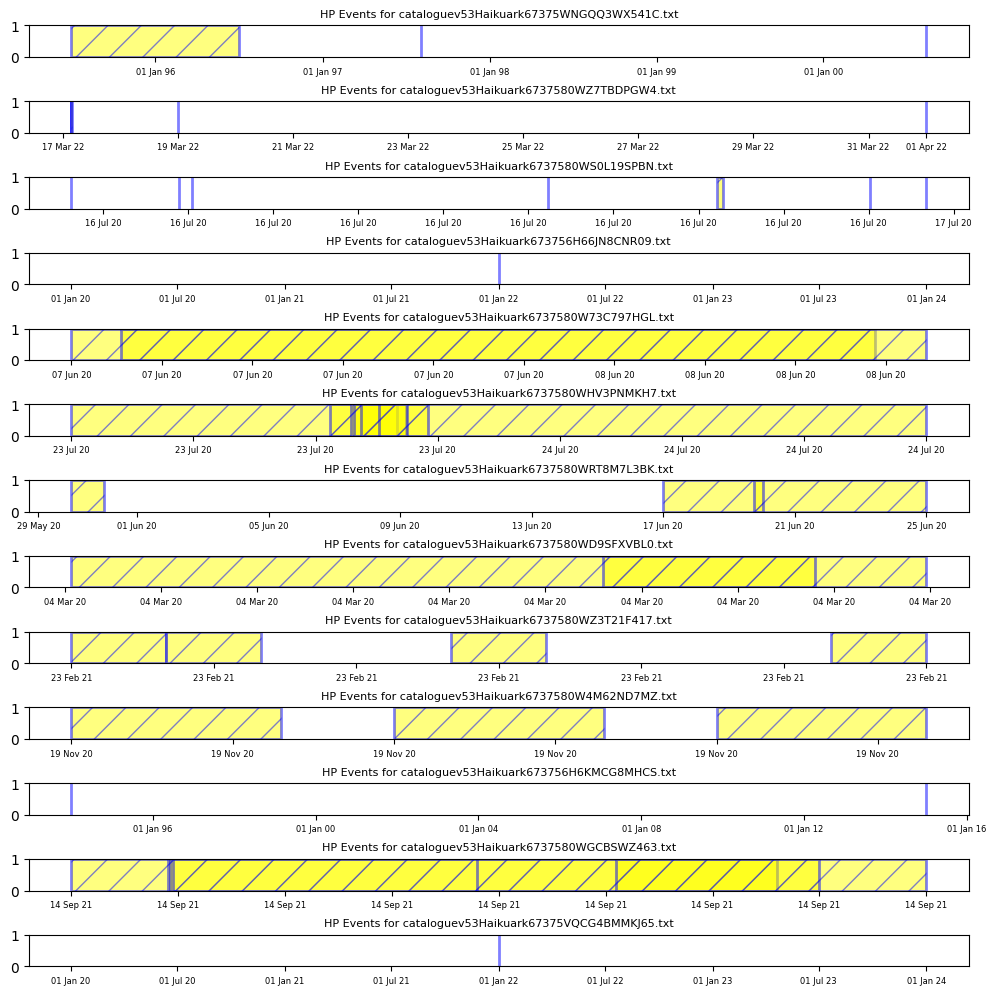

In [9]:
import os
import glob

rayan_dir = "rayan_dir"

if not os.path.isdir(rayan_dir):
   raise(Exception(f"no such dir {rayan_dir}"))


rayan_cats = glob.glob(os.path.join(rayan_dir, "*txt"))

# rayan_cats = rayan_cats[:5]

fig, ax = plt.subplots(len(rayan_cats), figsize=(10,10), sharex=False)
plt.subplots_adjust( top=0.9, bottom=0.1)
# left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace
plt.tight_layout() 
ax_idx = 0
for _c in rayan_cats:

    _df = cat2df(_c)
    filename = os.path.basename(_c)
    plotcat(_df, title=filename, ax=ax[ax_idx])
    ax_idx += 1
                       